<a href="https://colab.research.google.com/github/Saintone11/DataScience/blob/main/%ED%80%80%ED%8A%B8%EB%B6%84%EC%84%9D%EC%9E%90%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 22.1 MB/s eta 0:00:00


In [ ]:
import requests

ip = requests.get('https://api.ipify.org').text
print(f'My IP address is: {ip}')

My IP address is: 34.170.148.140


In [ ]:
import mysql.connector
import pandas as pd
config = {
    'user': 'root',
    'password': 'secret',
    'host': 'my-db.cnmka2oweh2n.ap-northeast-2.rds.amazonaws.com',
    'database': 'port',
    'port': '3306'
}

try:
    conn = mysql.connector.connect(**config)
    query = "SELECT stock_name, stock_date, open_price, close_price,high_price FROM stocks_after_20150615"
    df = pd.read_sql(query, conn)
    print(df.head())

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    if conn.is_connected():
        conn.close()

<ipython-input-73-363fbb5611d7>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  stock_name  stock_date  open_price  close_price  high_price
0       동화약품  2024-01-16       10280        10190       10370
1       동화약품  2024-01-15       10340        10280       10430
2       동화약품  2024-01-12       10580        10440       10580
3       동화약품  2024-01-11       10660        10500       10670
4       동화약품  2024-01-10       10590        10620       10710


In [ ]:
df["daily_return"] = (df['close_price'] - df['open_price'])/df['open_price'] * 100
df = df.sort_values(by=['stock_name', 'stock_date'])
df['prev_close'] = df.groupby('stock_name')['close_price'].shift(1)
df['close_open_gap'] = (df['open_price'] - df['prev_close']) / df['prev_close'] * 100
df = df.dropna()
df.head()

,stock_id,stock_name,stock_date,open_price,close_price,daily_return,prev_close,close_open_gap
3946981,9929209,3S,2015-06-16,2540,2490,-1.968504,2580.0,-1.550388
3946980,9929208,3S,2015-06-17,2490,2500,0.401606,2490.0,0.000000
3946979,9929207,3S,2015-06-18,2480,2490,0.403226,2500.0,-0.800000
3946978,9929206,3S,2015-06-19,2495,2515,0.801603,2490.0,0.200803
3946977,9929205,3S,2015-06-22,2540,2550,0.393701,2515.0,0.994036


<ipython-input-36-14ce3890e7f2>:20: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from current font.
  plt.tight_layout()
<ipython-input-36-14ce3890e7f2>:20: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
<ipython-input-36-14ce3890e7f2>:20: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  plt.tight_layout()
<ipython-input-36-14ce3890e7f2>:20: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWa

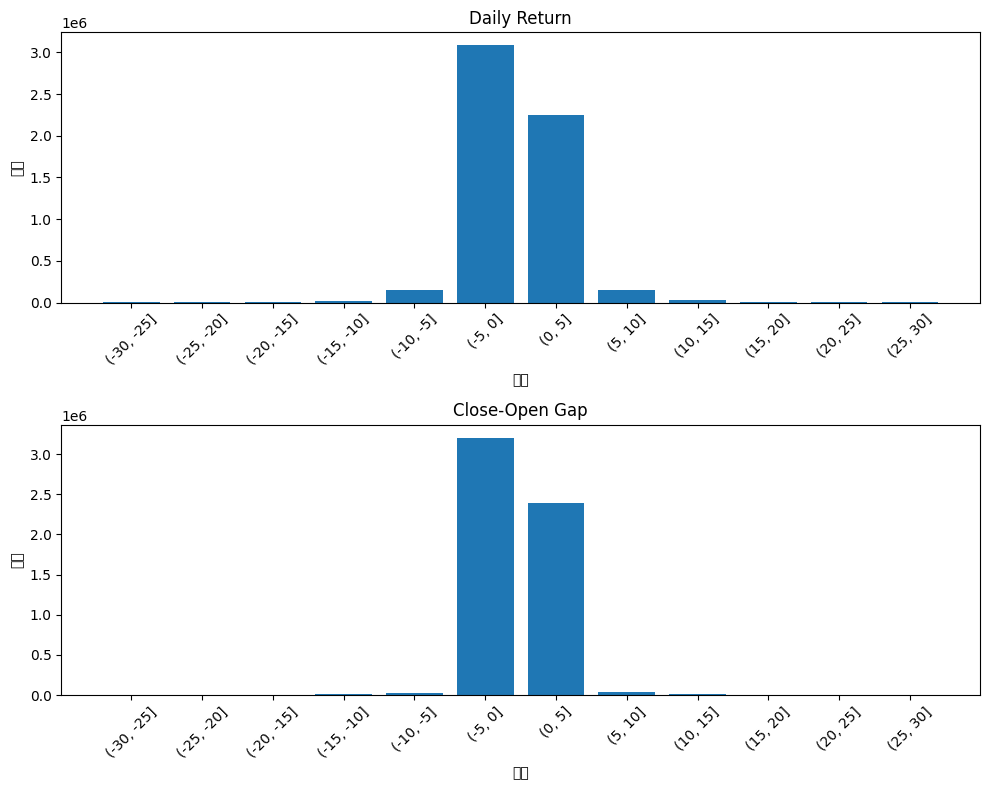

In [ ]:
import matplotlib.pyplot as plt
bins = [-30, -25,-20,-15,-10,-5,0,5,10,15,20,25, 30]
daily_return_counts = pd.cut(df['daily_return'], bins=bins).value_counts().sort_index()
close_open_gap_counts = pd.cut(df['close_open_gap'], bins=bins).value_counts().sort_index()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].bar(daily_return_counts.index.astype(str), daily_return_counts.values)
ax[0].set_title('Daily Return')
ax[0].set_xlabel('범위')
ax[0].set_ylabel('개수')
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(close_open_gap_counts.index.astype(str), close_open_gap_counts.values)
ax[1].set_title('Close-Open Gap')
ax[1].set_xlabel('범위')
ax[1].set_ylabel('개수')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

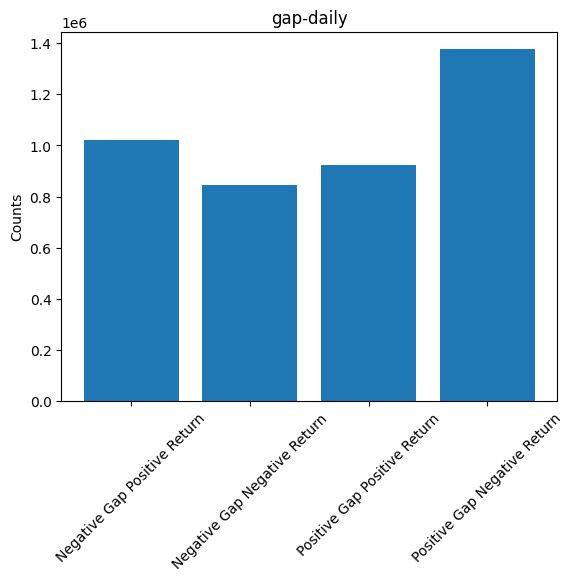

In [ ]:
negative_gap_positive_return = len(df[(df['close_open_gap'] < 0) & (df['daily_return'] > 0)])
negative_gap_negative_return = len(df[(df['close_open_gap'] < 0) & (df['daily_return'] < 0)])

positive_gap_positive_return = len(df[(df['close_open_gap'] > 0) & (df['daily_return'] > 0)])
positive_gap_negative_return = len(df[(df['close_open_gap'] > 0) & (df['daily_return'] < 0)])

data = {
    "Negative Gap Positive Return": negative_gap_positive_return,
    "Negative Gap Negative Return": negative_gap_negative_return,
    "Positive Gap Positive Return": positive_gap_positive_return,
    "Positive Gap Negative Return": positive_gap_negative_return
}

fig, ax = plt.subplots()
ax.bar(data.keys(), data.values())
ax.set_ylabel('Counts')
ax.set_title('gap-daily')
plt.xticks(rotation=45)
plt.show()

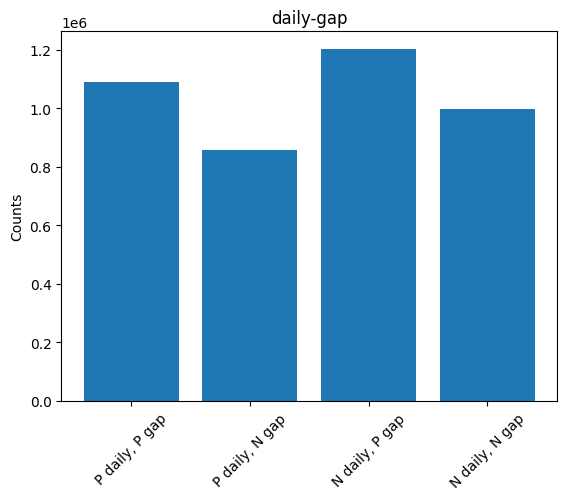

In [ ]:
df['prev_daily_return'] = df['daily_return'].shift(1)

prev_positive_today_positive = len(df[(df['prev_daily_return'] > 0) & (df['close_open_gap'] > 0)])
prev_positive_today_negative = len(df[(df['prev_daily_return'] > 0) & (df['close_open_gap'] < 0)])
prev_negative_today_positive = len(df[(df['prev_daily_return'] < 0) & (df['close_open_gap'] > 0)])
prev_negative_today_negative = len(df[(df['prev_daily_return'] < 0) & (df['close_open_gap'] < 0)])

data = {
    "P daily, P gap": prev_positive_today_positive,
    "P daily, N gap": prev_positive_today_negative,
    "N daily, P gap": prev_negative_today_positive,
    "N daily, N gap": prev_negative_today_negative
}

fig, ax = plt.subplots()
ax.bar(data.keys(), data.values())
ax.set_ylabel('Counts')
ax.set_title('daily-gap')
plt.xticks(rotation=45)
plt.show()




In [ ]:
prev_positive_stats = df[df['prev_daily_return'] > 0]['close_open_gap'].agg(['mean', 'std'])
prev_negative_stats = df[df['prev_daily_return'] < 0]['close_open_gap'].agg(['mean', 'std'])
today_positive_gap_stats = df[df['close_open_gap'] > 0]['daily_return'].agg(['mean', 'std'])
today_negative_gap_stats = df[df['close_open_gap'] < 0]['daily_return'].agg(['mean', 'std'])

print(prev_positive_stats)
print(prev_negative_stats)
print(today_positive_gap_stats)
print(today_negative_gap_stats)

mean    0.146066
std     1.778092
Name: close_open_gap, dtype: float64
mean    0.054981
std     1.614453
Name: close_open_gap, dtype: float64
mean   -0.283729
std     3.155922
Name: daily_return, dtype: float64
mean    0.236519
std     2.907014
Name: daily_return, dtype: float64


In [ ]:
bins = [-30, -3, 0, 3, 30]
labels = ['< -3%', '-3% to 0%', '0% to 3%', '> 3%']

df['close_open_gap_range'] = pd.cut(df['close_open_gap'], bins=bins, labels=labels)
df['daily_return_range'] = pd.cut(df['daily_return'], bins=bins, labels=labels)

transition_probabilities_co = {}
average_rewards_co = {}

for current_range in labels:
    for next_range in labels:
        total_count_co = len(df[df['close_open_gap_range'] == current_range])
        transition_count_co = len(df[(df['close_open_gap_range'] == current_range) & (df['daily_return_range'] == next_range)])
        probability_co = transition_count_co / total_count_co if total_count_co > 0 else 0

        average_reward_co = df[(df['close_open_gap_range'] == current_range) & (df['daily_return_range'] == next_range)]['daily_return'].mean()

        transition_probabilities_co[(current_range, next_range)] = probability_co
        average_rewards_co[(current_range, next_range)] = average_reward_co

transition_probabilities_co, average_rewards_co



({('< -3%', '< -3%'): 0.12622416632723538,
  ('< -3%', '-3% to 0%'): 0.27552375723874123,
  ('< -3%', '0% to 3%'): 0.29526980360210386,
  ('< -3%', '> 3%'): 0.2994935094834151,
  ('-3% to 0%', '< -3%'): 0.06964104550745928,
  ('-3% to 0%', '-3% to 0%'): 0.46885461994651895,
  ('-3% to 0%', '0% to 3%'): 0.387394497066726,
  ('-3% to 0%', '> 3%'): 0.07380970189088618,
  ('0% to 3%', '< -3%'): 0.09045633290623241,
  ('0% to 3%', '-3% to 0%'): 0.5272083821665555,
  ('0% to 3%', '0% to 3%'): 0.3098319385321666,
  ('0% to 3%', '> 3%'): 0.07247298376987558,
  ('> 3%', '< -3%'): 0.3873792822300631,
  ('> 3%', '-3% to 0%'): 0.3205645444705287,
  ('> 3%', '0% to 3%'): 0.15408999536106385,
  ('> 3%', '> 3%'): 0.1370524480931161},
 {('< -3%', '< -3%'): -6.473626417898026,
  ('< -3%', '-3% to 0%'): -0.9441269051972323,
  ('< -3%', '0% to 3%'): 1.3961129378870905,
  ('< -3%', '> 3%'): 6.941889172241876,
  ('-3% to 0%', '< -3%'): -4.838070006819461,
  ('-3% to 0%', '-3% to 0%'): -0.857086365439643,
 

In [ ]:
df_positive_daily_return = df[df['daily_return'] > 0]
count_per_stock = df_positive_daily_return.groupby('stock_name').size()
filtered_stocks = count_per_stock[count_per_stock >= 130].index
grouped_filtered = df_positive_daily_return[df_positive_daily_return['stock_name'].isin(filtered_stocks)].groupby('stock_name')['next_close_open_gap'].mean()

best_stock_filtered = grouped_filtered.idxmax()
best_stock_mean_return_filtered = grouped_filtered.max()

best_stock_filtered, best_stock_mean_return_filtered

('지누스', 1.3330731155876794)

In [ ]:
df = df.sort_values(by=['stock_name', 'stock_date'])
df['prev_close'] = df.groupby('stock_name')['close_price'].shift(1)
df['prev_high'] = df.groupby('stock_name')['high_price'].shift(1)
df['prev_open'] = df.groupby('stock_name')['open_price'].shift(1)
df = df.dropna()

df['prev_close_open_gap'] = (df['open_price'] - df['prev_close']) / df['prev_close'] * 100
df["high_open_gap"] = (df['high_price'] - df['open_price'])/df['open_price'] * 100
df["prev_high_prev_close_gap"] = (df['prev_high'] - df['prev_close'])/df['prev_close'] * 100
df["daily_return"] =  (df['close_price'] - df['open_price'])/df['open_price'] * 100
prev_positive_today_positive = len(df[(df['prev_high_prev_close_gap'] > 20) & (df['high_open_gap'] > 4)])
prev_positive_today_negative = len(df[(df['prev_high_prev_close_gap'] > 20) & (df['high_open_gap'] < 4)])


prev_positive_today_positive, prev_positive_today_negative

(6559, 5518)